In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import spiceypy as spice

In [2]:
spice.furnsh("C:/Users/lcube/Desktop/arduino/planets/kernels/kernel.txt")
spice.tkvrsn("TOOLKIT")

'CSPICE_N0066'

In [3]:
times = np.linspace(0, 50e6, 1000)
moon_positions = spice.spkpos('MOON', times, 'J2000', 'NONE', 'EARTH BARYCENTER')[0]
earth_positions = spice.spkpos('EARTH', times, 'J2000', 'NONE', 'EARTH BARYCENTER')[0]
mercury_positions = spice.spkpos('MERCURY', times, 'J2000', 'NONE', 'EARTH BARYCENTER')[0]
venus_positions = spice.spkpos('VENUS', times, 'J2000', 'NONE', 'EARTH BARYCENTER')[0]
mars_positions = spice.spkpos('MARS BARYCENTER', times, 'J2000', 'NONE', 'EARTH BARYCENTER')[0]

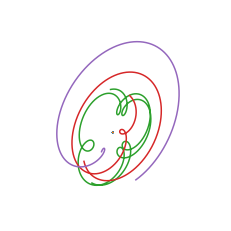

In [4]:
positions_list = [moon_positions.T, earth_positions.T, mercury_positions.T, venus_positions.T, mars_positions.T]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for positions in positions_list:
    ax.plot(positions[0], positions[1], positions[2])
plt.axis('off')
plt.show()

In [5]:
num = 1000
times = np.linspace(0, 1e7, num)
light_times = np.zeros(num)
for i in range(num):
    light_times[i] = spice.spkpos('MOON', times[i], 'J2000', 'NONE', 'EARTH BARYCENTER')[1]

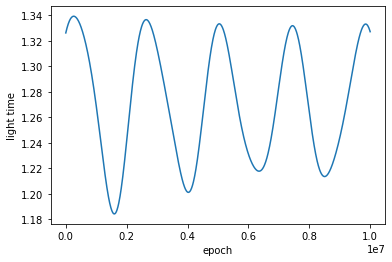

In [6]:
plt.plot(times, light_times)
plt.ylabel('light time')
plt.xlabel('epoch')
plt.show()

In [66]:
step = 100*365*4  # (years, days per year, checks per day)
# utc = ['15 Jul 1999 00:00', '15 Jul 2099 00:00']
utc = ['29 Dec 2020 00:00', '20 Jan 2021 00:00']
step = 10000
etOne = spice.str2et(utc[0])
etTwo = spice.str2et(utc[1])
times = [x*(etTwo-etOne)/step + etOne for x in range(step)]
print(np.shape(times))

(10000,)


In [67]:
mercury_distance = spice.spkpos('MERCURY', times, 'J2000', 'NONE', 'EARTH BARYCENTER')[1]
venus_distance = spice.spkpos('VENUS', times, 'J2000', 'NONE', 'EARTH BARYCENTER')[1]
mars_distance = spice.spkpos('MARS BARYCENTER', times, 'J2000', 'NONE', 'EARTH BARYCENTER')[1]
distance_list = [mercury_distance.T, venus_distance.T, mars_distance.T]
labels = ['mercury', 'venus', 'mars']
print(np.shape(distance_list))

(3, 10000)


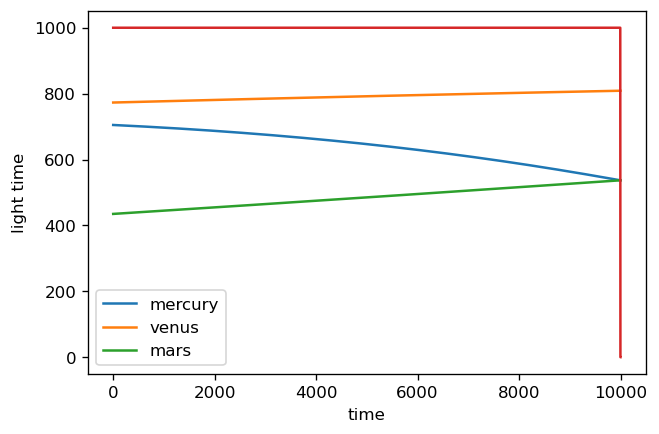

In [68]:
plt.figure(dpi=120)
for i,dist in enumerate(distance_list):
    plt.plot(dist, label=labels[i])
plt.plot(np.argmin(distance_list, axis=0) * 500)
plt.ylabel('light time')
plt.xlabel('time')
plt.legend()
plt.show()

In [43]:
distance_min = np.argmin(distance_list, axis=0)
distance_date = np.zeros((2,len(distance_min)), dtype=object)
distance_date[0] = times
distance_date[1] = distance_min
# for i in range(len(times)):
#     distance_date[0,i] = spice.et2utc(distance_date[0,i], 'ISOC', 0)
print(distance_date.shape)

(2, 10000)
[2 2 2 ... 1 1 1]


In [11]:
# now remove unneeded values
count = 1
for i in range(len(times)-1):
    previous = distance_date[1,count-1]
    if distance_date[1,count] == previous:
        distance_date = np.delete(distance_date, count-1, 1)
    else:
        count += 1
print(np.shape(distance_date))

KeyboardInterrupt: 

In [ ]:
print(distance_date)

In [ ]:
np.savetxt("C:/Users/lcube/Desktop/arduino/planets/planet_dates.txt", distance_date[0].T, newline=",", fmt="%s")
print('saved')

In [ ]:
np.savetxt("C:/Users/lcube/Desktop/arduino/planets/planet_ints.txt", distance_date[1].T, newline=",", fmt="%i")
print('saved')

In [ ]:
spice.et2utc(43499120.00, 'C', 0)